# Exploratory Data Analysis (EDA)

## Dataset Overview

This notebook performs exploratory data analysis on a synthetic e-commerce dataset created by Shriyash Jagtap using the Faker Python library.  
It simulates customer behavior including purchases, returns, and churn in an online marketplace.

The dataset is suitable for:
- Return prediction (our goal)
- Customer segmentation
- Churn analysis
- Product pricing strategies

## Data Columns

- **Customer ID**: Unique customer identifier  
- **Customer Name**: Generated full name  
- **Customer Age**: Integer value  
- **Gender**: Male/Female/Other  
- **Purchase Date**: Date of transaction  
- **Product Category**: Clothing, Books, Other  
- **Product Price**: Price per item  
- **Quantity**: Number of items purchased  
- **Total Purchase Amount**: Derived from price × quantity  
- **Payment Method**: e.g., Credit Card, PayPal  
- **Returns**: Binary indicator (0 = not returned, 1 = returned)  
- **Churn**: Whether the customer left the platform (1 = churned)  

## Objective

Our primary goal is to predict whether a product will be **returned**, using relevant features from the dataset.

## Data Source and License

- Dataset: [Kaggle - E-commerce Customer Behavior](https://www.kaggle.com/datasets/shriyashjagtap/e-commerce-customer-for-behavior-analysis)  
- Author: Shriyash Jagtap  
- License: [Open Database License (ODbL)](https://opendatacommons.org/licenses/odbl/)

## 🧭 EDA Index — Steps and Goals

Click a step to jump to its section:

- [1. Data Loading](#1-data-loading)
- [2. Basic Information](#2-basic-information)
- [3. Missing Values](#3-missing-values)
- [4. Data Types and Conversion](#4-data-types-and-conversion)
- [5. Duplicates](#5-duplicates)
- [6. Univariate Analysis](#6-univariate-analysis)
- [7. Outlier Detection and Treatment](#7-outlier-detection-and-treatment)
- [8. Bivariate & Multivariate Analysis](#8-bivariate--multivariate-analysis)
- [9. Class Imbalance Check](#9-class-imbalance-check)
- [10. Initial Insights](#10-initial-insights)

### 1. Data Loading
Load the dataset using pandas

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/raw/ecommerce_customer_data_large.csv")

### 2. Basic Information
Use `.info()`, `.head()`, `.shape`, `.columns`, and `.dtypes` to explore the structure and datatypes of the dataset.

In [2]:
# Check basic info
df.info()

# See first few rows
display(df.head())

# Check dataset shape
print(f"Dataset contains {df.shape[0]:,} rows and {df.shape[1]} columns.\n")

# Display column names
print("Column Names:")
print(df.columns.tolist())

# View descriptive statistics for numeric columns
print("\nDescriptive Statistics (Numerical Features):")
display(df.describe())

# View descriptive statistics for object/categorical columns
print("\nDescriptive Statistics (Categorical Features):")
display(df.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


Dataset contains 250,000 rows and 13 columns.

Column Names:
['Customer ID', 'Purchase Date', 'Product Category', 'Product Price', 'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age', 'Returns', 'Customer Name', 'Age', 'Gender', 'Churn']

Descriptive Statistics (Numerical Features):


,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,202618.000000,250000.000000,250000.00000
mean,25017.632092,254.742724,3.004936,2725.385196,43.798276,0.500824,43.798276,0.20052
std,14412.515718,141.738104,1.414737,1442.576095,15.364915,0.500001,15.364915,0.40039
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.00000
25%,12590.000000,132.000000,2.000000,1476.000000,30.000000,0.000000,30.000000,0.00000
50%,25011.000000,255.000000,3.000000,2725.000000,44.000000,1.000000,44.000000,0.00000
75%,37441.250000,377.000000,4.000000,3975.000000,57.000000,1.000000,57.000000,0.00000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.00000



Descriptive Statistics (Categorical Features):


,Purchase Date,Product Category,Payment Method,Customer Name,Gender
count,250000,250000,250000,250000,250000
unique,249728,4,3,39878,2
top,2020-10-16 09:27:42,Electronics,Credit Card,Michael Johnson,Male
freq,2,62630,83547,119,125676


Statements (S):
1. Customer Age and Age are identical based on count, mean, std, min, max
2. Purchase Date is of type object, not datetime
3. Product Category, Payment Method, Gender have 4, 3, 2 values respectively.
4. Only 39878 unique Customer Names of the 250000 rows of data and each Customer Name is linked to a Customer ID
5. Product category, payment method, gender appear fairly distributed, but Customer Name (which is linked to Customer ID) isn't

Actions (A):
1. (S1) drop Age column 
2. (S2) convert to datetime (will be done in Data Types and Conversion)
3. (S3) explore product category, payment method, and gender values
4. (S4) drop Customer names
5. (S5) drop Customer ID also?

In [3]:
#Drop Age column
df.drop(columns=["Age"], inplace=True)

# Verify that column has been dropped
display(df.head())

# Explore Product Category, Payment Method, and Gender values
print(df['Product Category'].value_counts())
print()
print(df['Payment Method'].value_counts())
print()
print(df['Gender'].value_counts())

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,Female,0


Product Category
Electronics    62630
Clothing       62581
Home           62542
Books          62247
Name: count, dtype: int64

Payment Method
Credit Card    83547
PayPal         83441
Cash           83012
Name: count, dtype: int64

Gender
Male      125676
Female    124324
Name: count, dtype: int64


In [4]:
# Drop Customer Name from DataFrame
df.drop(columns=["Customer Name"], inplace=True)

# Verify that column has been dropped
display(df.head())

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,Female,0


### 3. Missing Values
Check for missing/null values and decide how to handle them.

In [5]:
#Analyze missing values in Returns column
df["Returns"].isna().sum()  # count NaNs

np.int64(47382)

In [6]:
# I proceed to drop missing (NaN) rows in Return column
df.dropna(subset=["Returns"], inplace=True)

# Verify no more missing values
df["Returns"].isna().sum()

np.int64(0)

### 4. Data Types and Conversion
Convert data types where needed (e.g., dates, categorical encoding preparation).

In [22]:
#Convert Purchase Date to datetime
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])

# Extract year, month, and day from 'Purchase Date'
df['Purchase Year'] = df['Purchase Date'].dt.year
df['Purchase Month'] = df['Purchase Date'].dt.month
df['Purchase Day'] = df['Purchase Date'].dt.day_name()

# Preview the changes
df[['Purchase Date', 'Purchase Year', 'Purchase Month', 'Purchase Day']].head()

,Purchase Date,Purchase Year,Purchase Month,Purchase Day
0,2023-05-03 21:30:02,2023,5,Wednesday
1,2021-05-16 13:57:44,2021,5,Sunday
2,2020-07-13 06:16:57,2020,7,Monday
3,2023-01-17 13:14:36,2023,1,Tuesday
4,2021-05-01 11:29:27,2021,5,Saturday


### 5. Duplicates
Detect and remove duplicate rows if necessary.

In [8]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


### 6. Univariate Analysis
Explore single-variable distributions using histograms, bar plots, or value counts.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

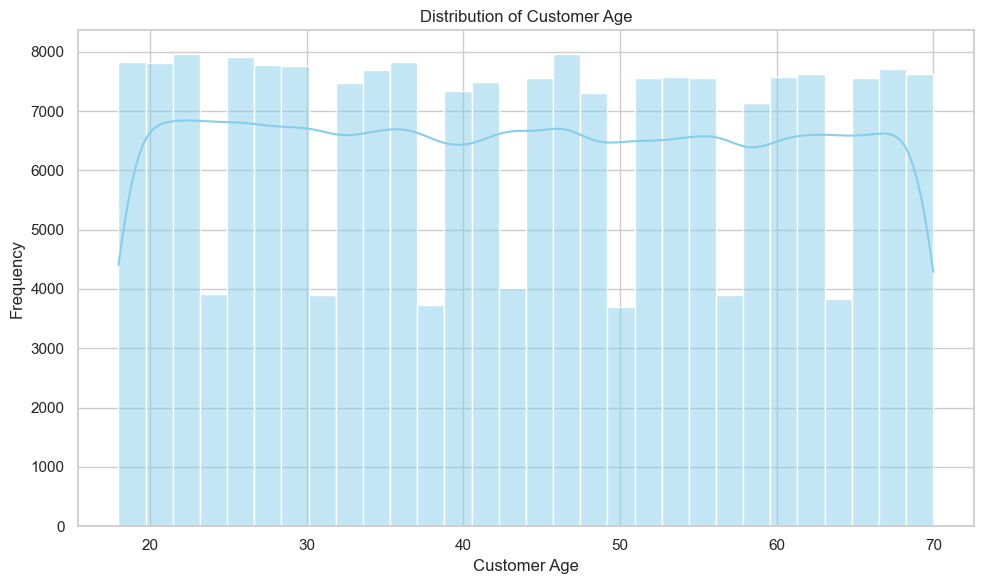

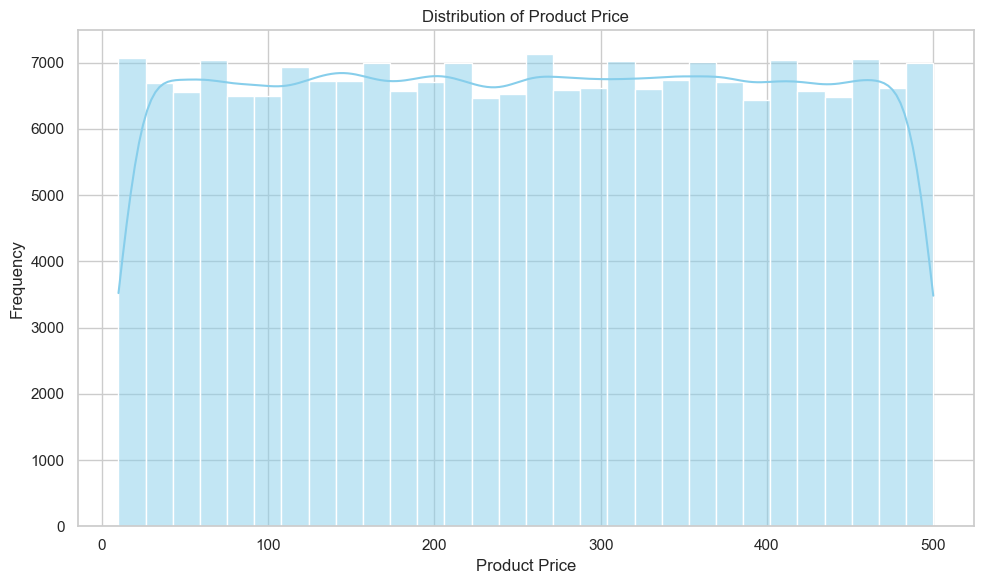

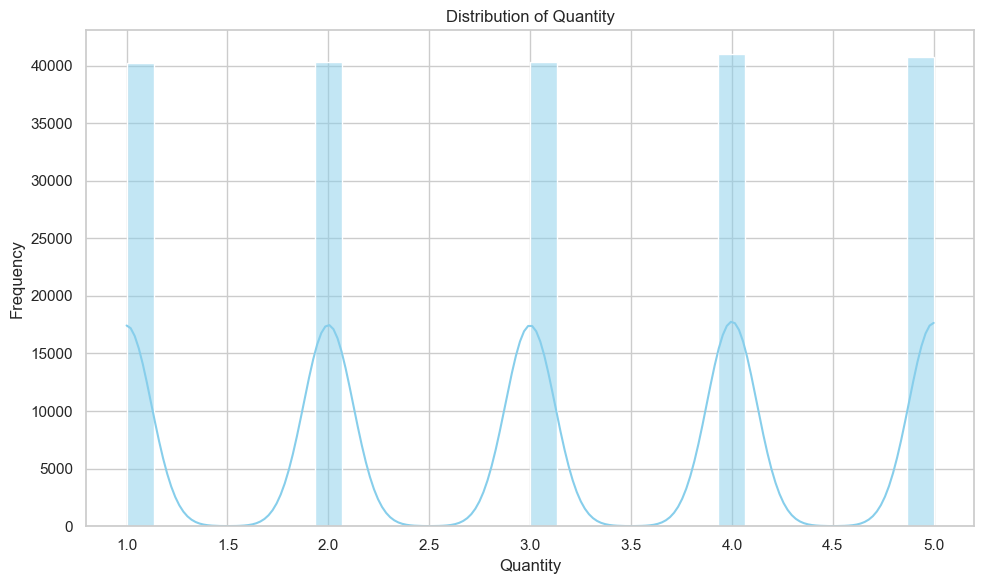

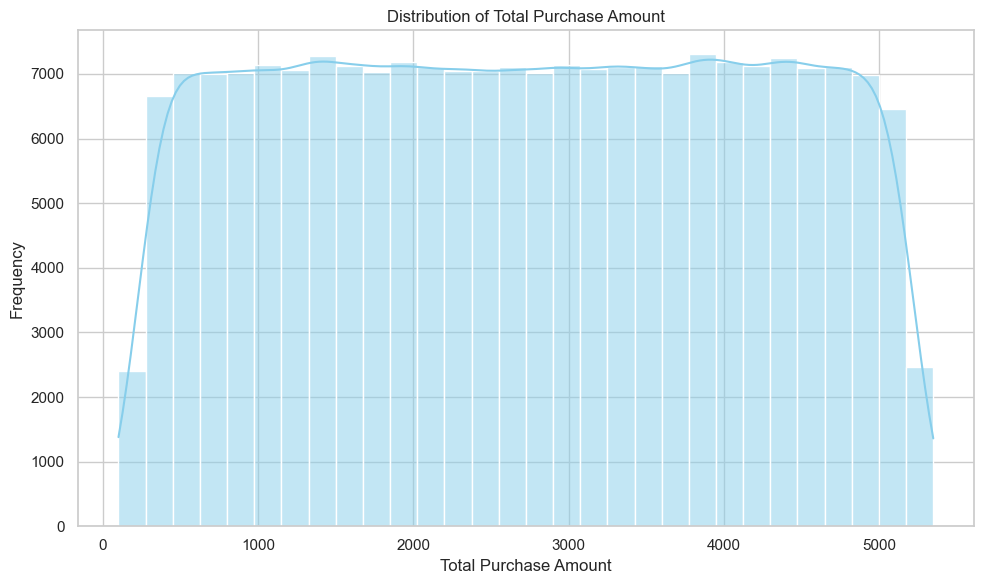

In [11]:
# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# -----------------------------
# Numerical Features Histogram
# -----------------------------
numerical_cols = ["Customer Age", "Product Price", "Quantity", "Total Purchase Amount"]

for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

Histogram interpretations:
1. Customer Age
·   The distribution is uniform which is combed, why?
2. Product Price
·   The distribution is uniform
3. Quantity
·   The distribution is uniform which is combed due to lack of resolution since it is not possible to buy half of an item.
4. Total purchase amount
·   The distribution is uniform

/var/folders/3y/3t9y2w7n5fb6lt73nw9p5zrc0000gn/T/ipykernel_59015/3479024166.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


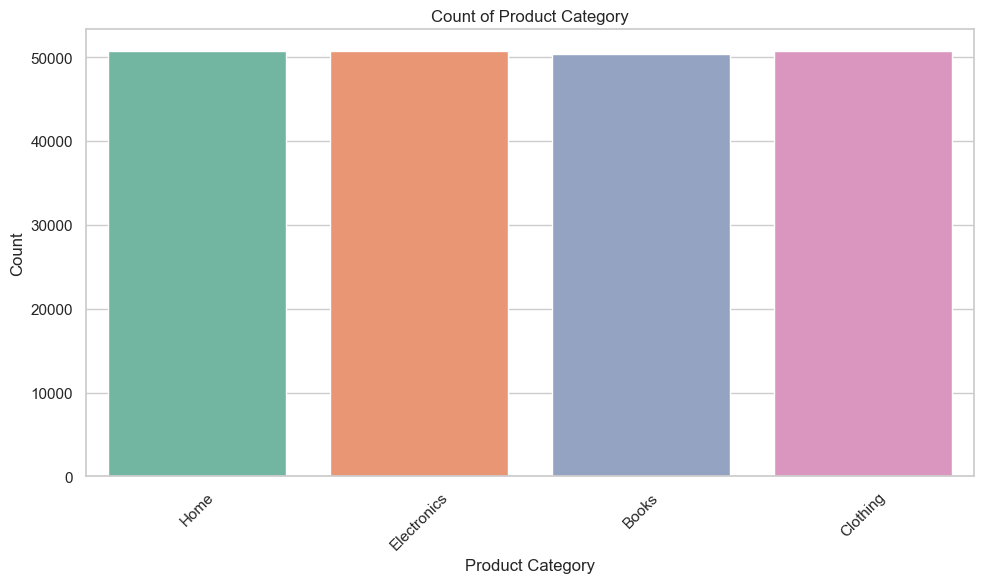

/var/folders/3y/3t9y2w7n5fb6lt73nw9p5zrc0000gn/T/ipykernel_59015/3479024166.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


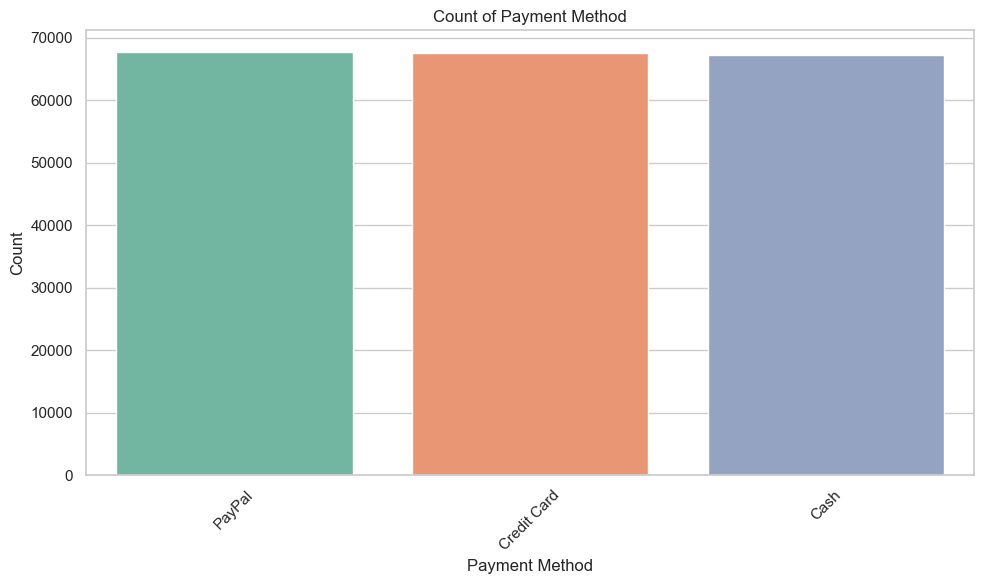

/var/folders/3y/3t9y2w7n5fb6lt73nw9p5zrc0000gn/T/ipykernel_59015/3479024166.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


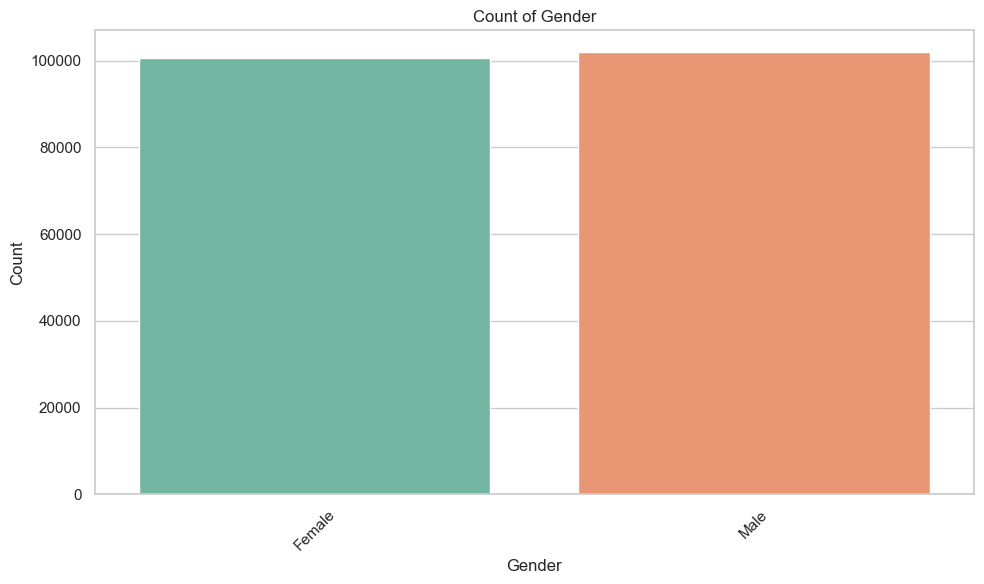

/var/folders/3y/3t9y2w7n5fb6lt73nw9p5zrc0000gn/T/ipykernel_59015/3479024166.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


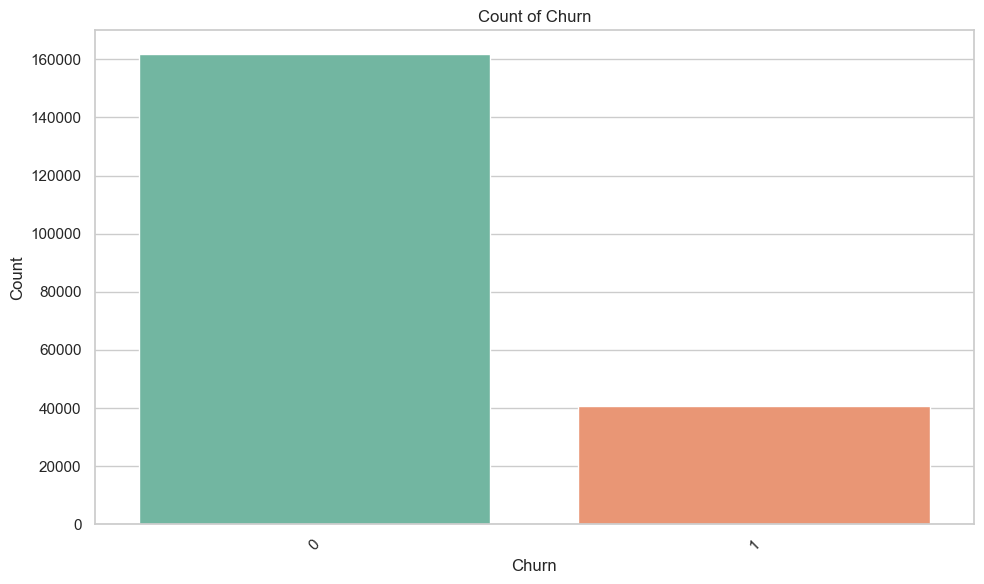

/var/folders/3y/3t9y2w7n5fb6lt73nw9p5zrc0000gn/T/ipykernel_59015/3479024166.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


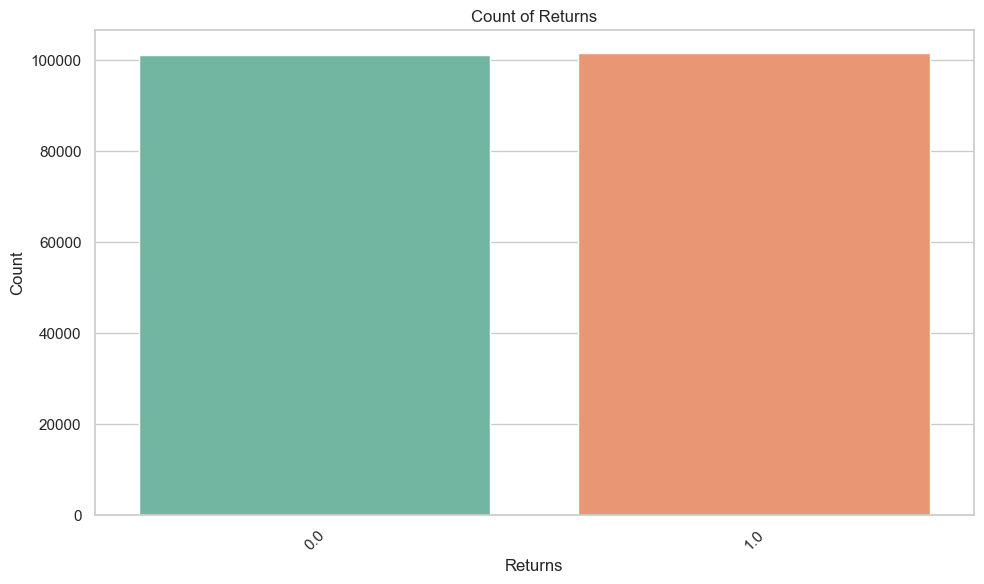

In [12]:
# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# -----------------------------
# Categorical Features Bar Plot
# -----------------------------
categorical_cols = ["Product Category", "Payment Method", "Gender", "Churn", "Returns"]

for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Bar chart Interpretations:
1. Product Category
·   A normal distribution
2. Payment Method
·   A normal distribution
3. Gender
·   A normal distribution
4. Churn
·   The churn value of 1 is only a quarter of the 0 value.
5. Returns
·   A normal distribution

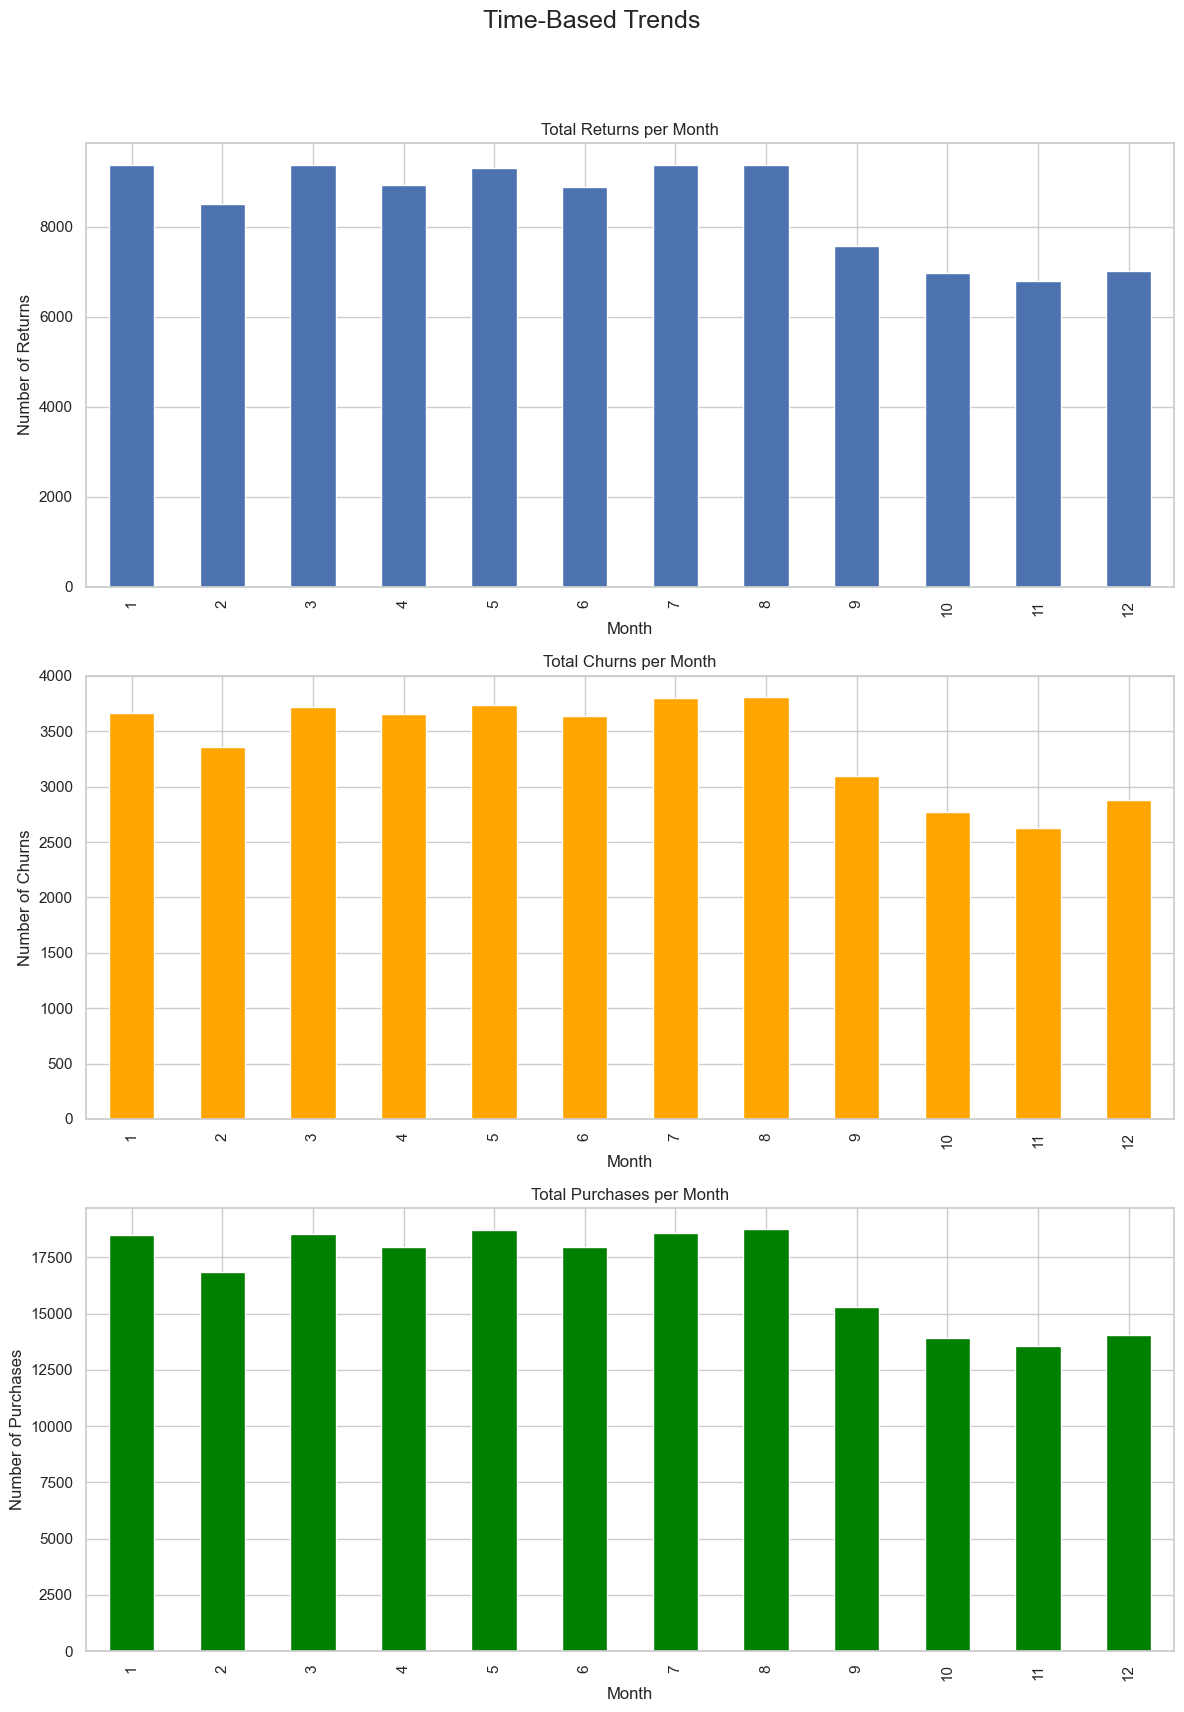

In [23]:
import matplotlib.pyplot as plt

# Set style
#plt.style.use('seaborn-vcolor')

# Figure setup
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle("Time-Based Trends", fontsize=18)

# 1. Total Returns per Month
df.groupby("Purchase Month")["Returns"].sum().plot(kind="bar", ax=axes[0])
axes[0].set_title("Total Returns per Month")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Number of Returns")

# 2. Total Churns per Month
df.groupby("Purchase Month")["Churn"].sum().plot(kind="bar", color="orange", ax=axes[1])
axes[1].set_title("Total Churns per Month")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Number of Churns")

# 3. Total Purchases per Month
df["Purchase Month"].value_counts().sort_index().plot(kind="bar", color="green", ax=axes[2])
axes[2].set_title("Total Purchases per Month")
axes[2].set_xlabel("Month")
axes[2].set_ylabel("Number of Purchases")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

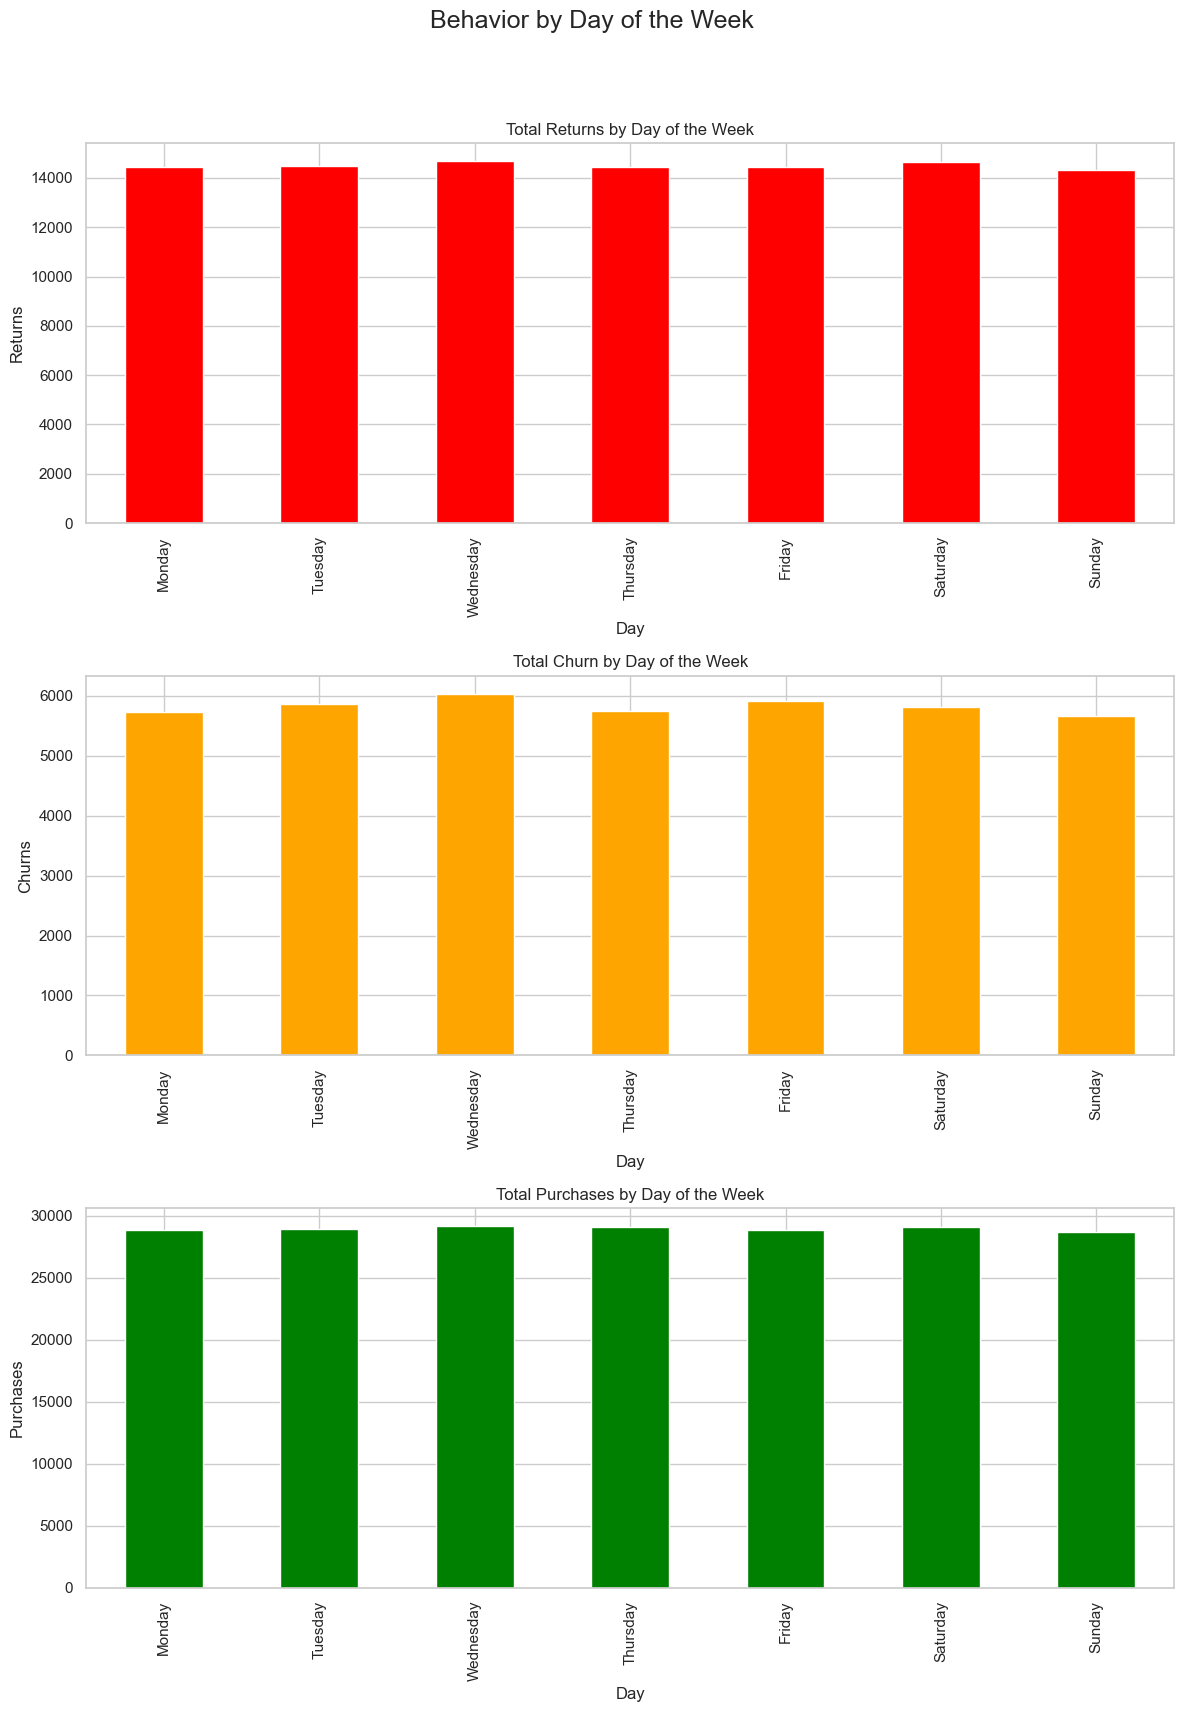

In [17]:
import matplotlib.pyplot as plt

# Ensure proper order of days
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Grouping data by day name
returns_by_day = df.groupby(df['Purchase Date'].dt.day_name())['Returns'].sum().reindex(ordered_days)
churn_by_day = df.groupby(df['Purchase Date'].dt.day_name())['Churn'].sum().reindex(ordered_days)
purchases_by_day = df['Purchase Date'].dt.day_name().value_counts().reindex(ordered_days)

# Plot
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle("Behavior by Day of the Week", fontsize=18)

# 1. Returns
returns_by_day.plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title("Total Returns by Day of the Week")
axes[0].set_ylabel("Returns")
axes[0].set_xlabel("Day")

# 2. Churn
churn_by_day.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title("Total Churn by Day of the Week")
axes[1].set_ylabel("Churns")
axes[1].set_xlabel("Day")

# 3. Purchases
purchases_by_day.plot(kind='bar', ax=axes[2], color='green')
axes[2].set_title("Total Purchases by Day of the Week")
axes[2].set_ylabel("Purchases")
axes[2].set_xlabel("Day")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 7. Outlier Detection and Treatment
Identify and optionally handle outliers using visual methods or statistical techniques (e.g., IQR, Z-score).

### 8. Bivariate & Multivariate Analysis
Explore relationships between variables using correlation matrices, scatter plots, boxplots, etc.

### 9. Class Imbalance Check
Check if the `Returns` column is imbalanced. This helps determine if resampling or adjustment is needed later.

### 10. Initial Insights
Summarize key findings that could influence feature engineering and model selection.